# Model Evaluation 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn import dummy
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
file_path = 'cwk_data_20542740.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,29,blue-collar,single,primary,no,722,yes,no,cellular,15,78,1,359,1,failure,no
1,39,blue-collar,married,primary,no,2366,yes,no,cellular,16,1007,3,325,4,failure,no
2,30,blue-collar,single,secondary,yes,4,yes,no,unknown,23,84,3,-1,0,unknown,no
3,29,blue-collar,married,secondary,no,832,yes,no,unknown,16,228,2,-1,0,unknown,no
4,33,management,single,tertiary,no,2364,no,no,cellular,17,508,1,-1,0,unknown,yes


In [4]:
df['y'] = [0 if x == 'no' else 1 for x in df['y']]

In [5]:
#input features
df_input = df.iloc[:,:-1]
df_input.shape 

(4000, 15)

In [6]:
#output features
df_output = df.iloc[:,-1]
df_output.shape 

(4000,)

In [7]:
df_input = pd.get_dummies(df_input, dtype=int)
df_input.head(3)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,29,722,15,78,1,359,1,0,1,0,...,1,1,0,1,0,0,1,0,0,0
1,39,2366,16,1007,3,325,4,0,1,0,...,1,1,0,1,0,0,1,0,0,0
2,30,4,23,84,3,-1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1


In [8]:
X = df_input
y = df_output

In [9]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(2800, 39)
(1200, 39)
(2800,)
(1200,)


# Point model

In [10]:
#create a dummy classifier as our baseline
dc = dummy.DummyClassifier()

In [11]:
#Fit the model on the training set
dc.fit(X_train, y_train)

DummyClassifier()

In [15]:
#Obtain the score (performance) of our classifier
#on the testing set
score = dc.score(X_test, y_test)

In [16]:
#-- print the results
print("Baseline Accuracy:", score)
print(len(y.values))

Baseline Accuracy: 0.7933333333333333
4000


In [17]:
y_pred1 = dc.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       952
           1       0.00      0.00      0.00       248

    accuracy                           0.79      1200
   macro avg       0.40      0.50      0.44      1200
weighted avg       0.63      0.79      0.70      1200



C:\Users\roshn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roshn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roshn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred1)
print(cm)

[[952   0]
 [248   0]]


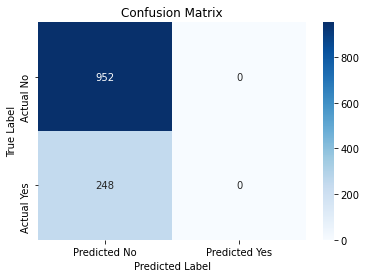

In [19]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes Classifier

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
nb_classifier = GaussianNB(var_smoothing=1e-9)

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [22]:
accuracy

0.7766666666666666

In [23]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       952
           1       0.47      0.56      0.51       248

    accuracy                           0.78      1200
   macro avg       0.67      0.70      0.68      1200
weighted avg       0.79      0.78      0.78      1200



In [24]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[792 160]
 [108 140]]


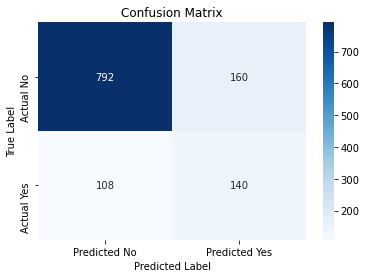

In [25]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [26]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [27]:
# Using the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=20, min_samples_leaf=7,random_state=42)

In [28]:
# Fit the model on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=7, random_state=42)

In [29]:
# Make predictions on the testing data
predictions = decision_tree.predict(X_test)

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [31]:
# Print the output
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       952
           1       0.56      0.49      0.52       248

    accuracy                           0.81      1200
   macro avg       0.72      0.70      0.70      1200
weighted avg       0.81      0.81      0.81      1200



In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)
print(cm)

[[856  96]
 [126 122]]


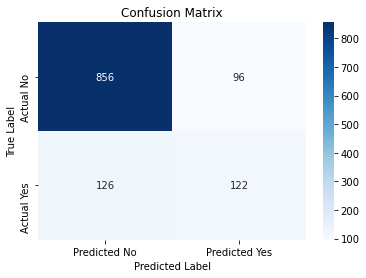

In [33]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=5))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

## parameters of RF
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]

}

Mean Cross Validation Score for Random Forest Classifier: 86.93%


In [37]:
## initiate gridsearch and print the best parameter combination
rf_grid_search = GridSearchCV(rf_clf,
                              rf_param_grid,
                              cv = 7)
rf_grid_search.fit(X_train, y_train)


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.4%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 87.3214%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [38]:
rf_clf1 = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=3, min_samples_split= 10,n_estimators= 100)
rf_clf1

RandomForestClassifier(min_samples_leaf=3, min_samples_split=10)

In [39]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=10)

In [40]:
y_pred = rf_clf1.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall =  recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall Score:", recall)

Accuracy: 0.8533333333333334
Precision: 0.8435634451019066
F1 Score: 0.8451697912125175
Recall Score: 0.5201612903225806


In [42]:
recall_yes = recall_score(y_test,y_pred , pos_label=1)
recall_no = recall_score(y_test,y_pred , pos_label=0)

print(f"Recall for class 'yes': {recall_yes}")
print(f"Recall for class 'no': {recall_no}")

Recall for class 'yes': 0.5201612903225806
Recall for class 'no': 0.9401260504201681


In [43]:
classification_rep = classification_report(y_test, y_pred)

In [44]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       952
           1       0.69      0.52      0.59       248

    accuracy                           0.85      1200
   macro avg       0.79      0.73      0.75      1200
weighted avg       0.84      0.85      0.85      1200



In [45]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[895  57]
 [119 129]]


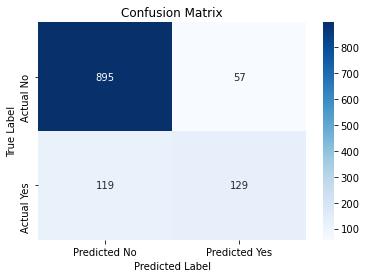

In [46]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()